In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of poping up a new window. More about that later. 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib inline

In [3]:
from pylab import *
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
from scipy.interpolate import interp1d
import numpy as np

In [5]:
df = pd.read_csv('./result.csv')
df = df.set_index('nodes')

In [6]:
df.head()

,nothing,100MB
nodes,,
10,20,1020
20,40,2040
30,60,3060
40,80,4080
50,100,5100


In [7]:
df.index

Int64Index([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], dtype='int64', name='nodes')

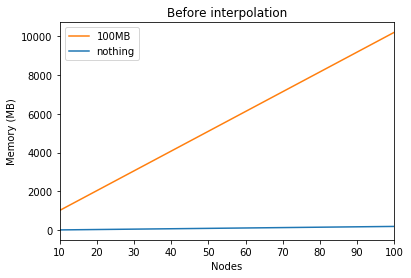

In [8]:
ax = df.plot.line()
ax.set_title('Before interpolation')
ax.set_xlabel("Nodes")
ax.set_ylabel("Memory (MB)")

order = df.values.argsort()[-1][::-1]
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=list(np.array(handles)[order]),labels=list(np.array(labels)[order]))

In [9]:
f1 = interp1d(df.index, df['100MB'], kind='cubic')
f2 = interp1d(df.index, df['nothing'], kind='cubic')

In [10]:
df_int = pd.DataFrame()
new_index = np.arange(10, 110, 10)
df_int['100MB'] = f1(new_index)
df_int['nothing'] = f2(new_index)
df_int.index = new_index

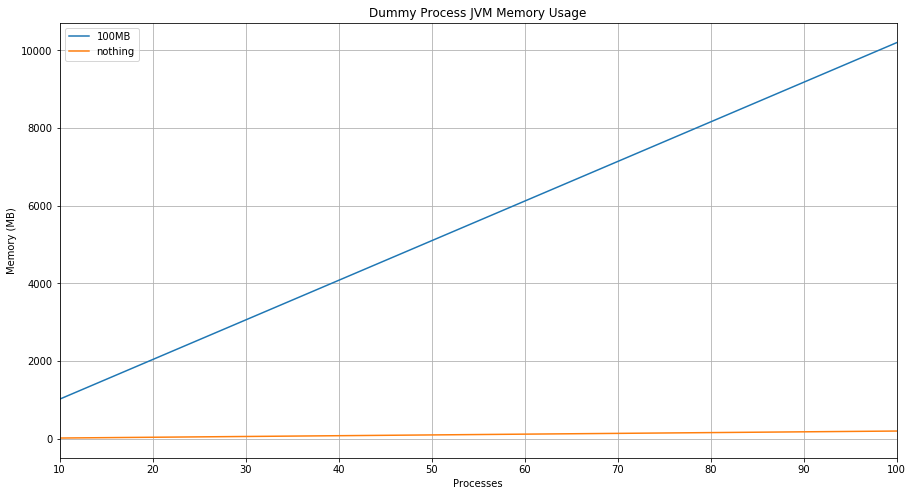

In [11]:
ax2 = df_int.plot.line(figsize=(15,8),  grid=True)
ax2.set_title('Dummy Process JVM Memory Usage')
ax2.set_xlabel("Processes")
ax2.set_ylabel("Memory (MB)")

order = df.values.argsort()[-1][::-1]
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=list(np.array(handles)[order]),labels=list(np.array(labels)[order]))

plt.savefig('plot.png')